Aaron Vo

In [84]:
# Load packages
library(stats)
library(ggplot2)
library(TSA)

7. Simulate an MA(2) time series of length n = 36 with θ1 = 0.7 and θ2 = −0.4.
   
   (a) What are the theoretical autocorrelations for this model?

   (b) Calculate and plot the sample ACF for your simulated series. How well do the values and patterns match the theoretical ACF from part (a)?
   
   (c) Calculate and plot the theoretical partial autocorrelation function for this model. Plot sufficient lags until the correlations are negligible. (Hint: See Equation (6.2.6) on page 114.)
   
   (d) Calculate and plot the sample PACF for your simulated series. How well dothe values and patterns match the theoretical ACF from part (c)?

   (a) What are the theoretical autocorrelations for this model?

AR(1) = (-θ<sub>1</sub> + θ<sub>1</sub>θ<sub>2</sub>) / (1 + θ<sub>1</sub><sup>2</sup> + θ<sub>2</sub><sup>2</sup>)

AR(2) = (-θ<sub>2</sub>)/ (1 + θ<sub>1</sub><sup>2</sup> + θ<sub>2</sub><sup>2</sup>)

In [53]:
ar_1 = (-.7 + (-.4*.7)) / (1 + .7^2 + .4^2)
ar_2 = .4/(1 + .7^2 + .4^2) 
cat("Autocorrelation with 1st order: ", ar_1, "\n")
cat("Autocorrelation with 2nd order: ", ar_2)

Autocorrelation with 1st order:  -0.5939394 
Autocorrelation with 2nd order:  0.2424242

   (b) Calculate and plot the sample ACF for your simulated series. How well do the values and patterns match the theoretical ACF from part (a)?

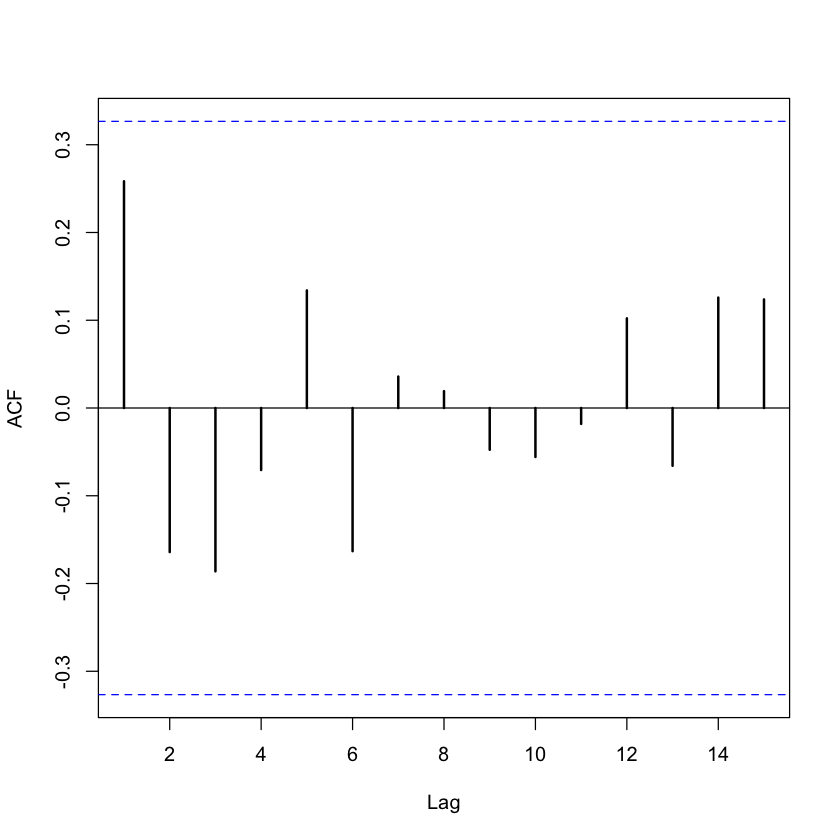

In [49]:
series=arima.sim(n=36,list(ma=c(0.7,-0.4)))
ACF=ARMAacf(ma=c(0.7,-0.4),lag.max=10)
acf_values = acf(series, lwd=2, main="")

In [50]:
cat("ACF at lag", 1, ":", acf_values$acf[1], "\n")
cat("ACF at lag", 2, ":", acf_values$acf[2], "\n")

ACF at lag 1 : 0.2583837 
ACF at lag 2 : -0.1641822 


ACF values of this simulated series are 0.2583837 & -0.1641822 (for 1st & 2nd order lag). These 2 values are different from theoritical values mentioned in part a).

   (c) Calculate and plot the theoretical partial autocorrelation function for this model. Plot sufficient lags until the correlations are negligible. (Hint: See Equation (6.2.6) on page 114.)


φ<sub>kk</sub> = (θ<sup>k</sup> (1 - θ<sup>2</sup>)) / (1 - θ<sup>2(k + 1)</sup>) for k >= 1


This equation is for the MA(1) case and not for MA(2)

In [82]:
theta1 = 0.7
theta2 = -0.4
lag = 2

theoretical_pacf1 = -0.7 / (1 + 0.7^2 + 0.4^2)
theoretical_pacf2 = 0.4 / (1 + 0.7^2 + 0.4^2)
                     
cat("Theoretical PACF values for MA(2) process:", "\n")
cat("Lag 1:", ":", theoretical_pacf1, "\n")
cat("Lag 2:", ":", theoretical_pacf2, "\n")

Theoretical PACF values for MA(2) process: 
Lag 1: : -0.4242424 
Lag 2: : 0.2424242 


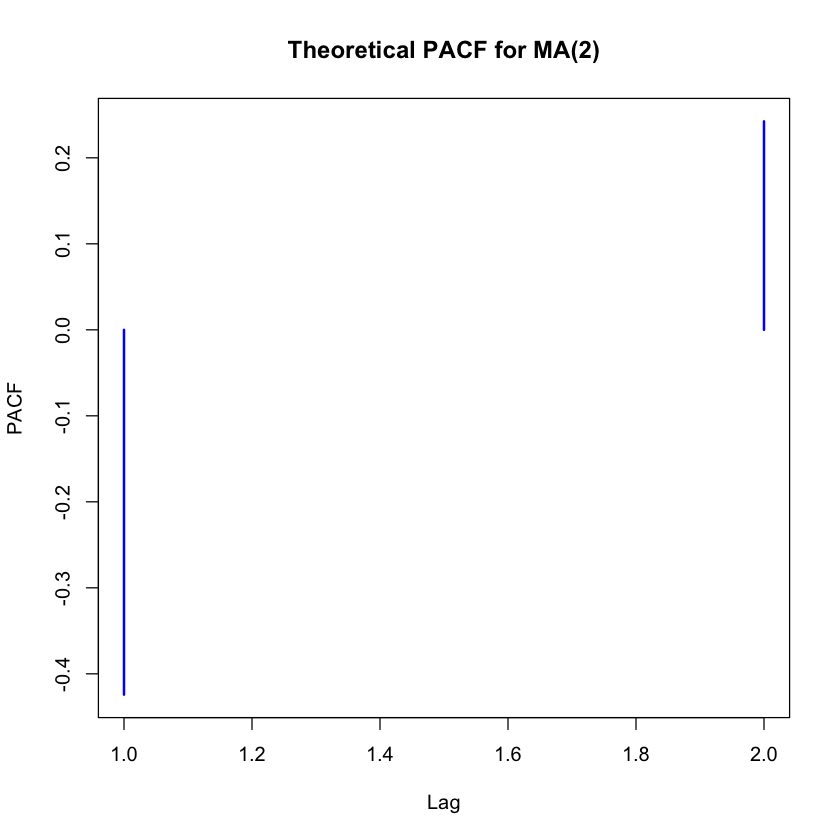

In [83]:
theoretical_pacf <- c(theoretical_pacf1, theoretical_pacf2)
plot(1:lag, theoretical_pacf, type = 'h', lwd = 2, col = 'blue',
     main = 'Theoretical PACF for MA(2)', xlab = 'Lag', ylab = 'PACF')

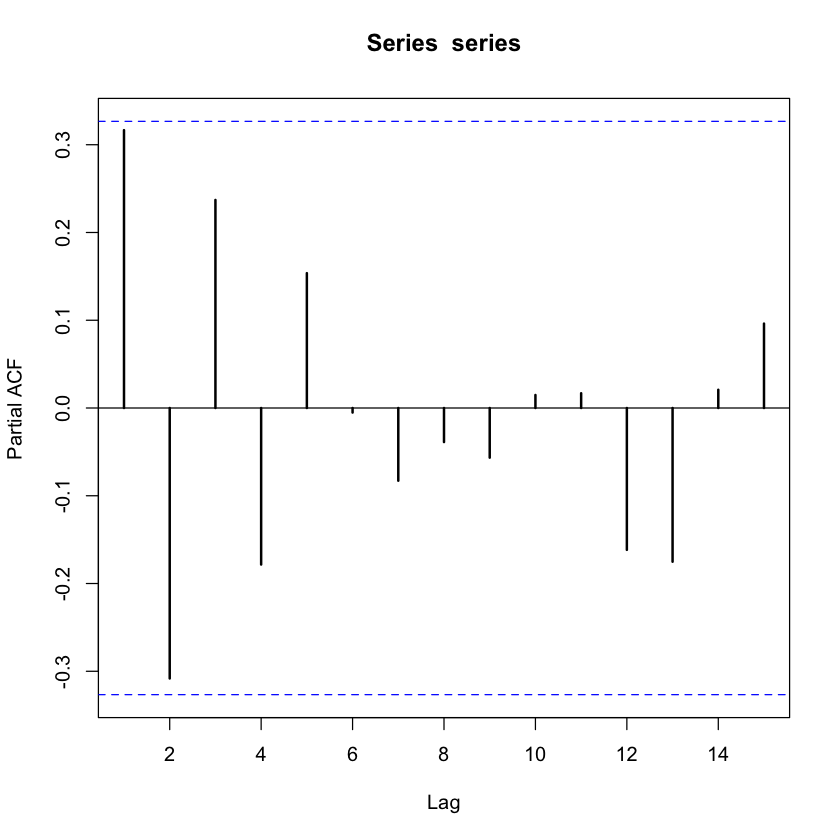

In [47]:
series2=arima.sim(n=1000,list(ma=c(-0.7,0.4)))
pacf(series, lwd=2)

   (d) Calculate and plot the sample PACF for your simulated series. How well dothe values and patterns match the theoretical ACF from part (c)?

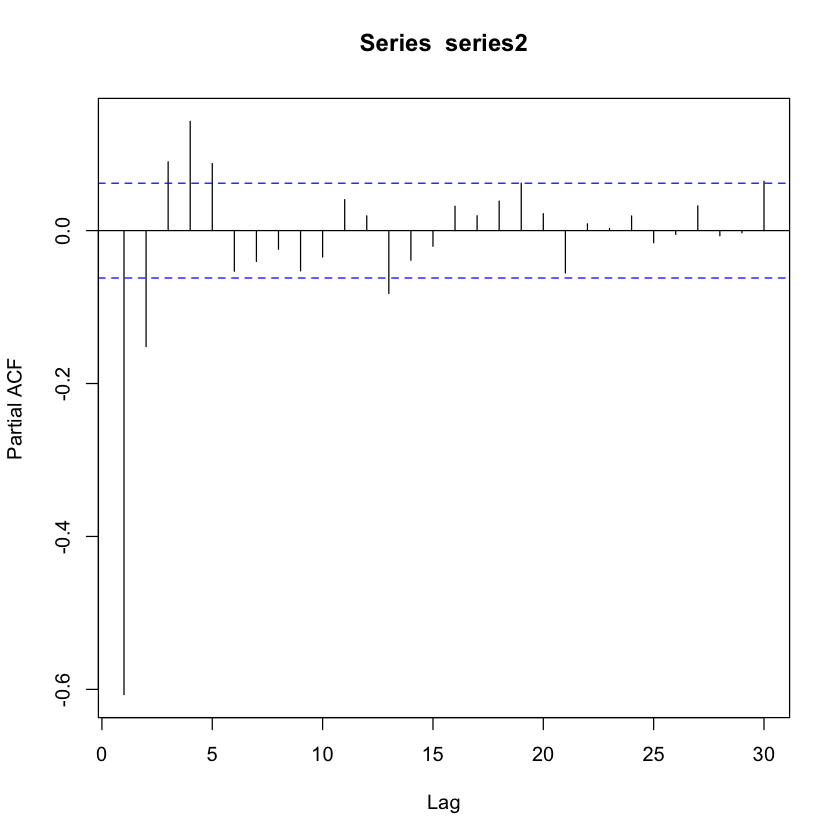

In [85]:
pacf(series2)

We see that while the theoretical partial autorcorrelation valeus at lag 1 and 2 are differen,t they do resemble the trends set by the theorteical values.

9. The data file named robot contains a time series obtained from an industrial robot. The robot was put through a sequence of maneuvers, and the distance from a desired ending point was recorded in inches. This was repeated 324 times to form the time series.

    (a) Display the time series plot of the data. Based on this information, do these data appear to come from a stationary or nonstationary process?

    (b) Calculate and plot the sample ACF and PACF for these data. Based on this additional information, do these data appear to come from a stationary or nonstationary process?

    (c) Calculate and interpret the sample EACF.
    
    (d) Use the best subsets ARMA approach to specify a model for these data. Compare these results with what you discovered in parts (a), (b), and (c)

In [58]:
library(TSA)
data(robot)

 (a) Display the time series plot of the data. Based on this information, do these data appear to come from a stationary or nonstationary process?

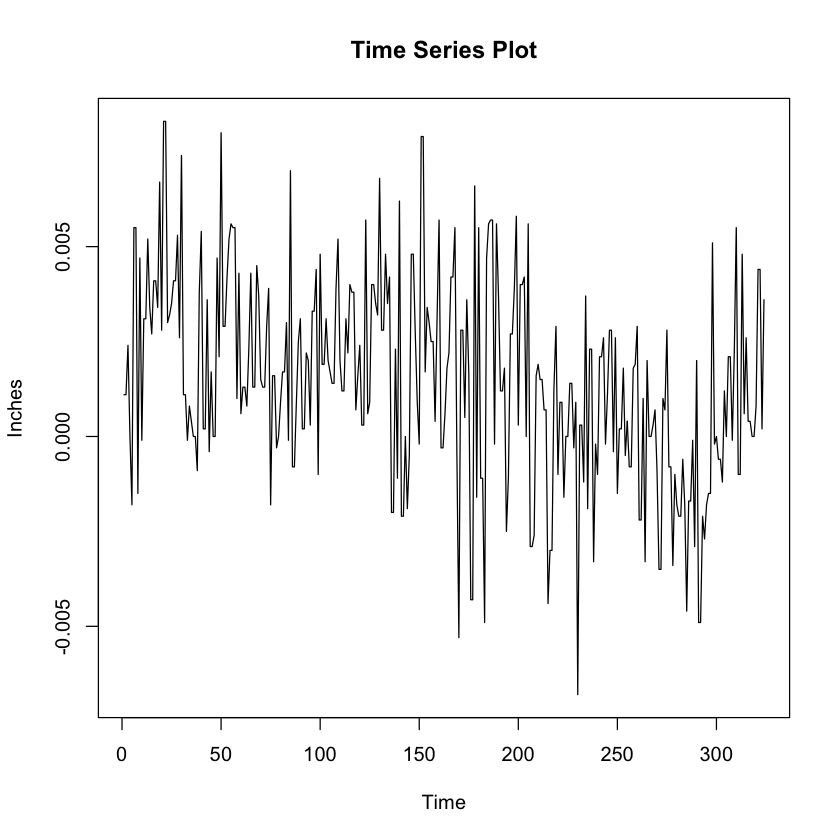

In [61]:
plot(robot, type = 'l', xlab = 'Time', ylab="Inches", main = 'Time Series Plot')

The data seem to be stationary as there is no noticable trend upward or downward. The variance and seasonal patterns remain constant over time and there is no repeating cycles.

(b) Calculate and plot the sample ACF and PACF for these data. Based on this additional information, do these data appear to come from a stationary or nonstationary process?

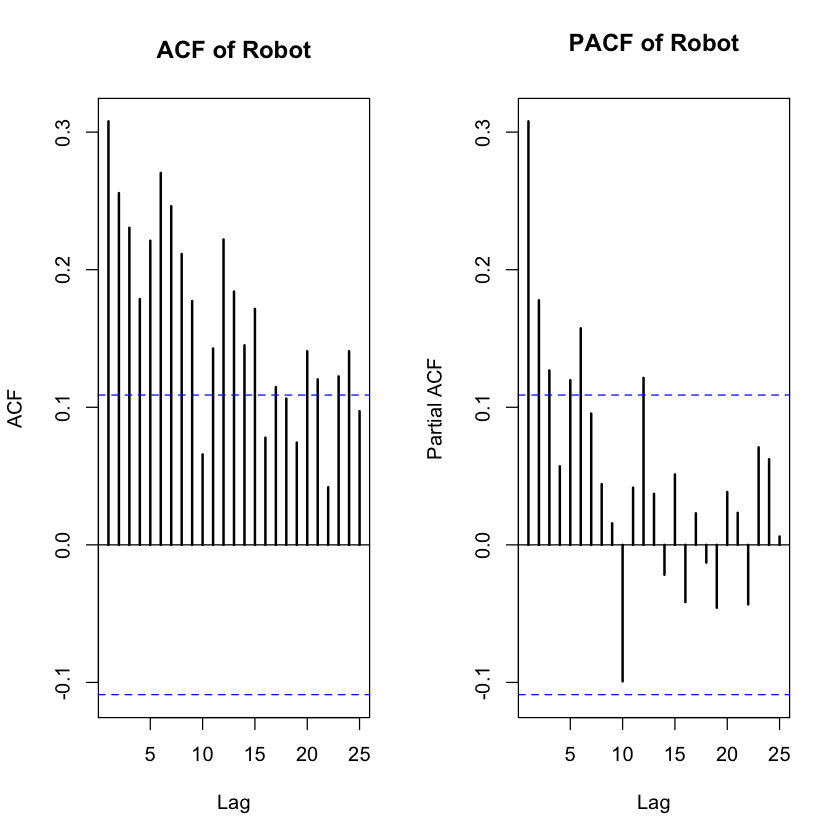

In [64]:
par(mfrow = c(1,2))

acf(robot, lwd=2, main = "ACF of Robot")
pacf(robot, lwd=2, main = "PACF of Robot")

Based on the ACF plots, we can see that it is non stationary as the ACF values, lie within the confidence intervals. It is also ACF in a  decline slowly. The PACF plots looks to be stationary as the PACF has a sharp cut off after lag 10.

(c) Calculate and interpret the sample EACF. 

In [65]:
eacf(robot)

AR/MA
  0 1 2 3 4 5 6 7 8 9 10 11 12 13
0 x x x x x x x x x o x  x  x  x 
1 x o o o o o o o o o o  o  o  o 
2 x x o o o o o o o o o  o  o  o 
3 x x o o o o o o o o o  o  o  o 
4 x x x x o o o o o o o  o  x  o 
5 x x x o o o o o o o o  o  x  o 
6 x o o o o x o o o o o  o  o  o 
7 x o o x o x x o o o o  o  o  o 


Based on the EACF, we see that the data follows an ARMA(1,1) model, where p=1 and q= 1, .

(d) Use the best subsets ARMA approach to specify a model for these data. Compare these results with what you discovered in parts (a), (b), and (c)

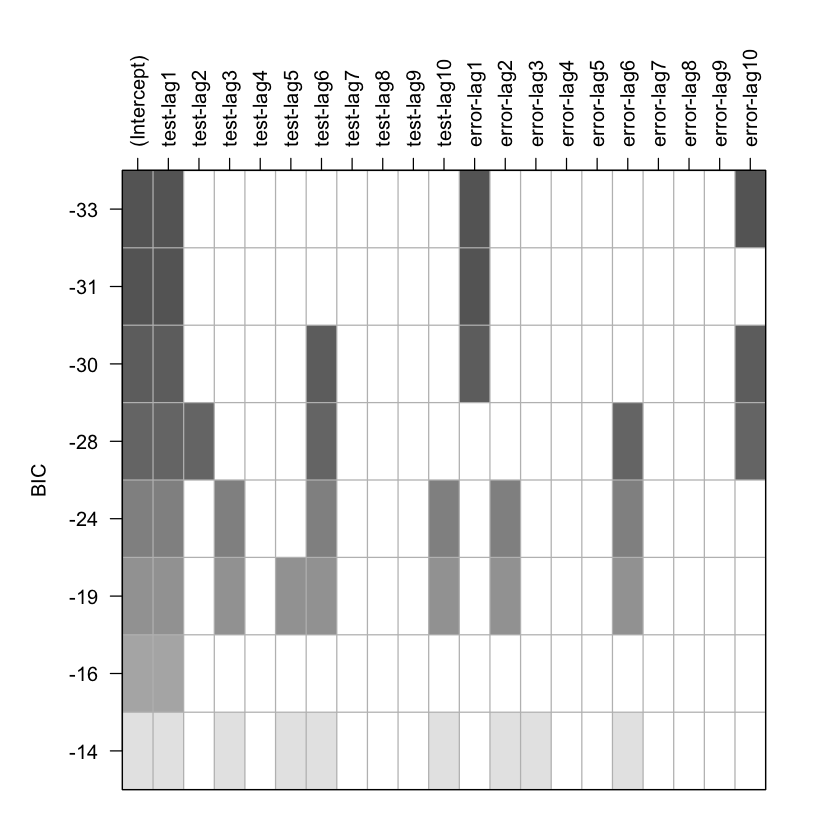

In [68]:
ARMArobots=armasubsets(y = robot, nar = 10, nma = 10, y.name = "test", ar.method = "ols")
plot(ARMArobots)

Based on this plot, we see that the test-lag1 and the error-lag1 is highlighted significant. This implies that the p and q here is  important to the model. This means that the choice for p=1 and q=1 is correct for our model